# Kmeans Algorithm on Penguins Dataset

<b> Load Dataset

In [5]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # for data visualization
import seaborn as sns # for statistical data visualization
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [7]:
data = pd.read_csv(r"C:\Users\santhosh\Downloads\penguins.csv")
data

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,MALE
1,39.5,17.4,186.0,3800.0,FEMALE
2,40.3,18.0,195.0,3250.0,FEMALE
3,NaN,NaN,NaN,NaN,NaN
4,36.7,19.3,193.0,3450.0,FEMALE
...,...,...,...,...,...
339,NaN,NaN,NaN,NaN,NaN
340,46.8,14.3,215.0,4850.0,FEMALE
341,50.4,15.7,222.0,5750.0,MALE
342,45.2,14.8,212.0,5200.0,FEMALE


In [9]:
data.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,MALE
1,39.5,17.4,186.0,3800.0,FEMALE
2,40.3,18.0,195.0,3250.0,FEMALE
3,NaN,NaN,NaN,NaN,NaN
4,36.7,19.3,193.0,3450.0,FEMALE


In [11]:
data.shape

(344, 5)

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   culmen_length_mm   342 non-null    float64
 1   culmen_depth_mm    342 non-null    float64
 2   flipper_length_mm  342 non-null    float64
 3   body_mass_g        342 non-null    float64
 4   sex                335 non-null    object 
dtypes: float64(4), object(1)
memory usage: 13.6+ KB


<b> Data Clean

In [15]:
data.isnull().sum()

culmen_length_mm     2
culmen_depth_mm      2
flipper_length_mm    2
body_mass_g          2
sex                  9
dtype: int64

In [17]:
data.dropna(inplace=True)

In [19]:
data.isnull().sum()

culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

In [21]:
data.duplicated().sum()

0

In [29]:
data.columns

Index(['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm',
       'body_mass_g', 'sex'],
      dtype='object')

<b>Exploratory Data Analysis 

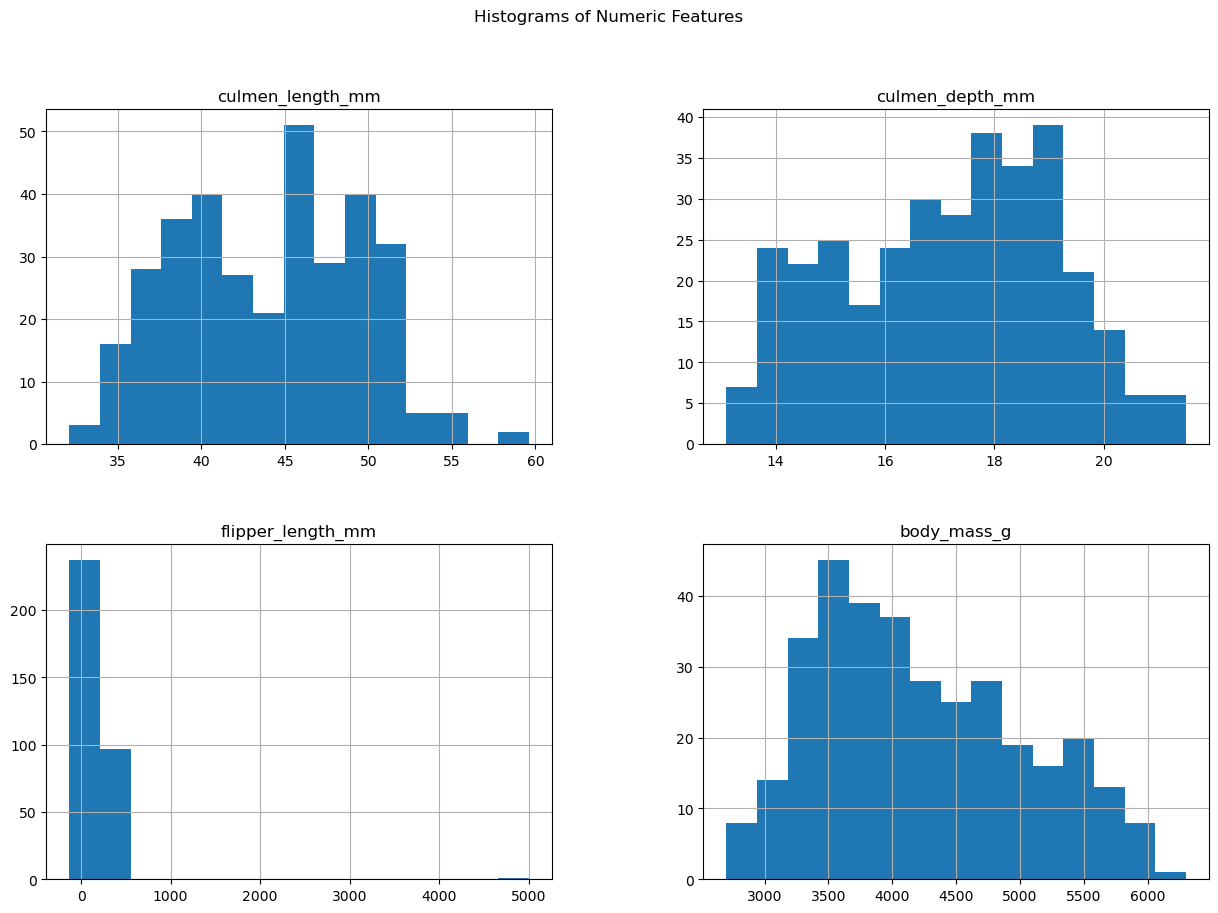

In [23]:
# Plot histograms for numeric features
data.hist(bins=15, figsize=(15, 10), layout=(2, 2))
plt.suptitle('Histograms of Numeric Features')
plt.show()


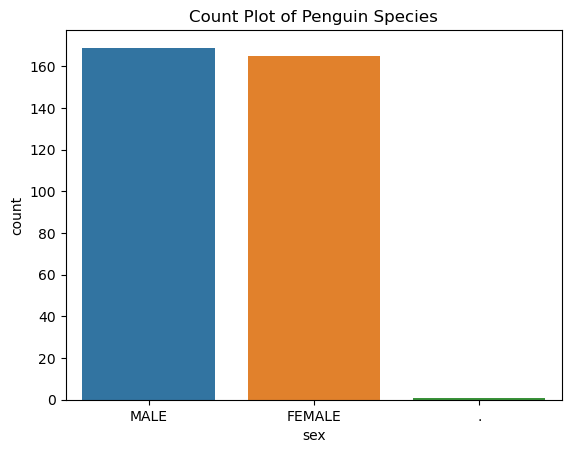

In [31]:
sns.countplot(x='sex', data=data)
plt.title('Count Plot of Penguin Species')
plt.show()


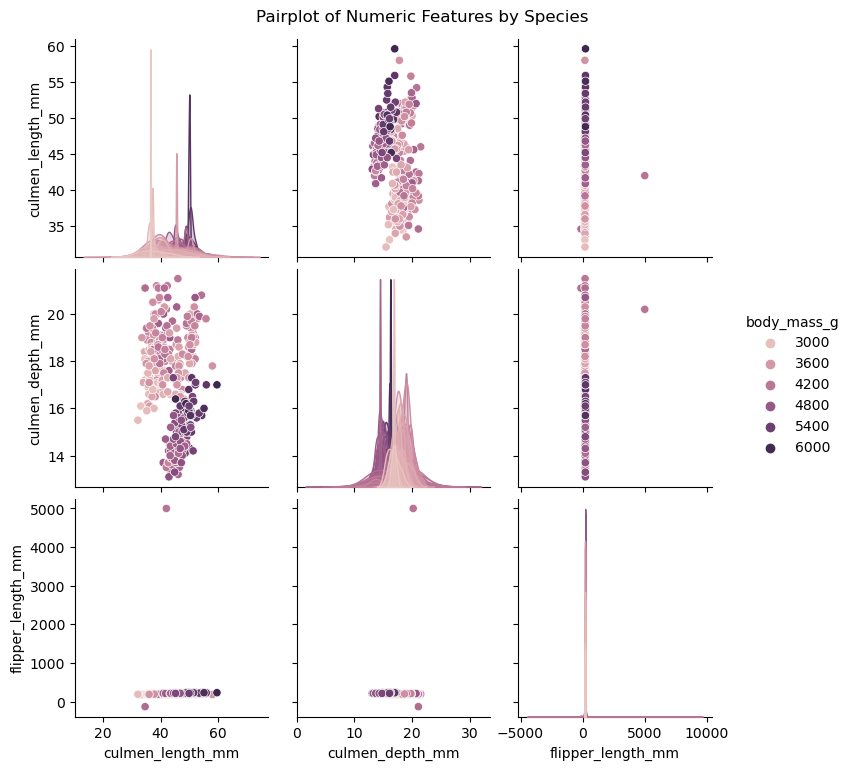

In [33]:
sns.pairplot(data, hue='body_mass_g')
plt.suptitle('Pairplot of Numeric Features by Species', y=1.02)
plt.show()

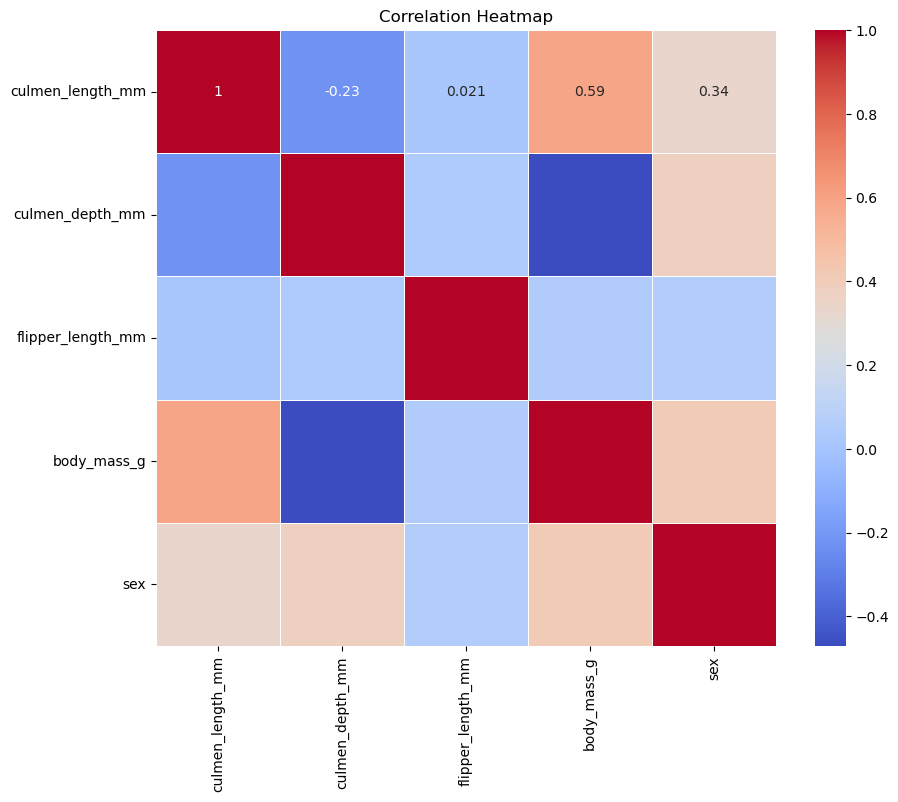

In [37]:
from sklearn.preprocessing import LabelEncoder
non_numeric_columns = data.select_dtypes(exclude=['int64', 'float64']).columns
label_encoders = {}
for column in non_numeric_columns:
    label_encoders[column] = LabelEncoder()
    data[column] = label_encoders[column].fit_transform(data[column])


plt.figure(figsize=(10, 8))
corr_matrix = data.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


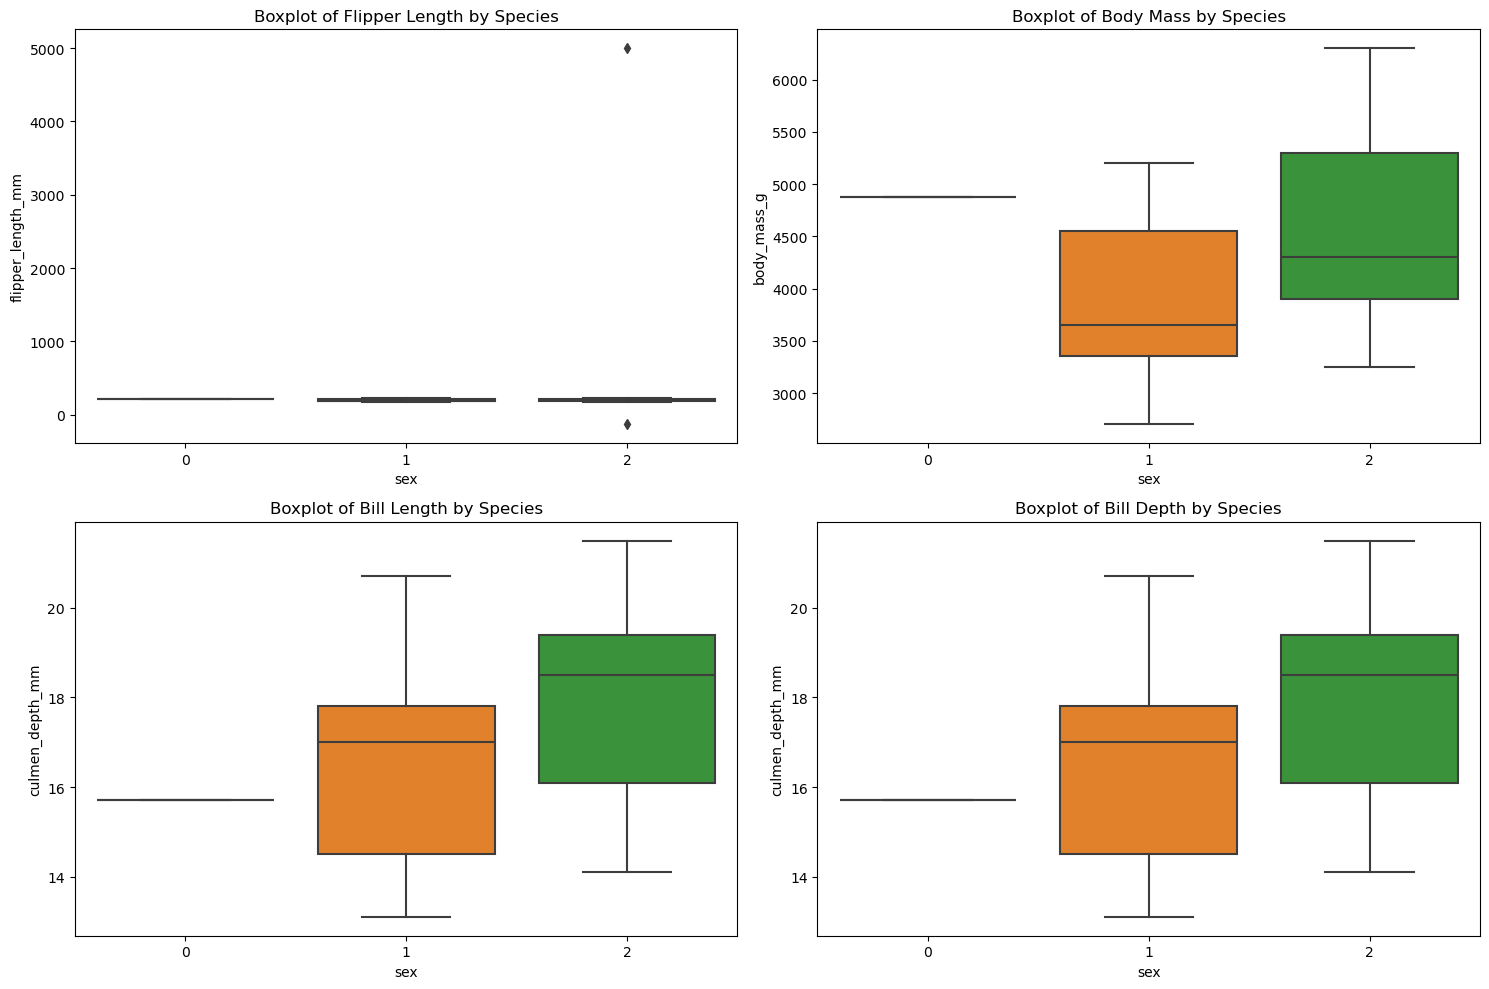

In [43]:
plt.figure(figsize=(15, 10))

# Boxplot for Flipper Length
plt.subplot(2, 2, 1)
sns.boxplot(x='sex', y='flipper_length_mm', data=data)
plt.title('Boxplot of Flipper Length by Species')

# Boxplot for Body Mass
plt.subplot(2, 2, 2)
sns.boxplot(x='sex', y='body_mass_g', data=data)
plt.title('Boxplot of Body Mass by Species')

# Boxplot for Bill Length
plt.subplot(2, 2, 3)
sns.boxplot(x='sex', y='culmen_depth_mm', data=data)
plt.title('Boxplot of Bill Length by Species')

# Boxplot for Bill Depth
plt.subplot(2, 2, 4)
sns.boxplot(x='sex', y='culmen_depth_mm', data=data)
plt.title('Boxplot of Bill Depth by Species')

plt.tight_layout()
plt.show()


<b> Model Evaluation

In [53]:
X = data

y = data['sex']

In [55]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

X['sex'] = le.fit_transform(X['sex'])

y = le.transform(y)

In [57]:
X.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,2
1,39.5,17.4,186.0,3800.0,1
2,40.3,18.0,195.0,3250.0,1
4,36.7,19.3,193.0,3450.0,1
5,39.3,20.6,190.0,3650.0,2


In [59]:
cols = X.columns

In [61]:
from sklearn.preprocessing import MinMaxScaler

ms = MinMaxScaler()

X = ms.fit_transform(X)

In [63]:
X = pd.DataFrame(X, columns=[cols])

In [65]:
X.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,0.254545,0.666667,0.060990,0.291667,1.0
1,0.269091,0.511905,0.061964,0.305556,0.5
2,0.298182,0.583333,0.063718,0.152778,0.5
3,0.167273,0.738095,0.063328,0.208333,0.5
4,0.261818,0.892857,0.062744,0.263889,1.0


<b> Applying Algorithm

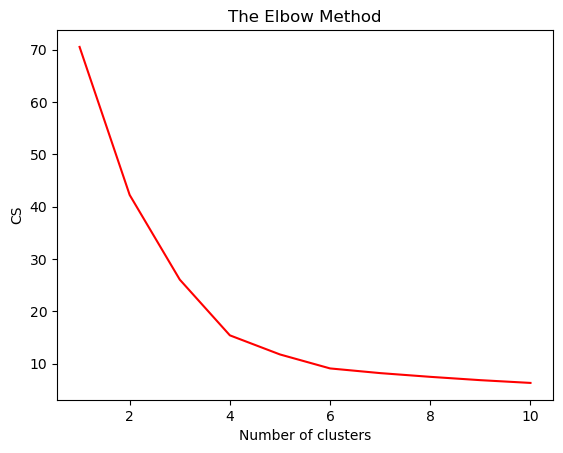

In [67]:
from sklearn.cluster import KMeans
cs = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 30, n_init = 10, random_state = 0)
    kmeans.fit(X)
    cs.append(kmeans.inertia_)
plt.plot(range(1, 11), cs, color='r')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('CS')
plt.show()

In [68]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, random_state=0) 

kmeans.fit(X)

KMeans(n_clusters=2, random_state=0)

In [69]:
kmeans.cluster_centers_

array([[0.49934373, 0.57199211, 0.07071882, 0.51220414, 1.        ],
       [0.36405257, 0.39536718, 0.06420147, 0.32454819, 0.49698795]])

In [70]:
kmeans.inertia_

42.215369899487186

In [71]:
labels = kmeans.labels_

# check how many of the samples were correctly labeled
correct_labels = sum(y == labels)

print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))

Result: 165 out of 335 samples were correctly labeled.


<b> Accuracy Score

In [22]:
print('Accuracy score: {0:0.2f}'. format(correct_labels/float(y.size)))

Accuracy score: 0.49
